In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2024-06-15 08:41:06.129008: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-15 08:41:06.129186: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-15 08:41:06.292990: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0067.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0153.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0105.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0018.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0050.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0029.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0195.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0051.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0074.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0142.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0149.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0121.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0194.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0003.png
/kaggl

In [4]:
# Load the data from the dataset
data_dir = '/kaggle/input/leapgestrecog/leapgestrecog/leapGestRecog/'

In [5]:
# Function to load images and labels
def load_data(data_dir):
    X = []
    y = []
    label_dict = {}
    current_label = 0
    
    for folder in os.listdir(data_dir):
        if os.path.isdir(os.path.join(data_dir, folder)):
            for subfolder in os.listdir(os.path.join(data_dir, folder)):
                subfolder_path = os.path.join(data_dir, folder, subfolder)
                if os.path.isdir(subfolder_path):
                    for file in os.listdir(subfolder_path):
                        if file.endswith(".png"):
                            img_path = os.path.join(subfolder_path, file)
                            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                            img = cv2.resize(img, (128, 128))
                            X.append(img)
                            if subfolder not in label_dict:
                                label_dict[subfolder] = current_label
                                current_label += 1
                            y.append(label_dict[subfolder])
    
    X = np.array(X)
    y = np.array(y)
    return X, y, label_dict

In [6]:
# Load the dataset
X, y, label_dict = load_data(data_dir)

# Normalize and reshape the data
X = X / 255.0
X = X.reshape(X.shape[0], 128, 128, 1)

# Convert labels to one-hot encoding
y = to_categorical(y, num_classes=len(label_dict))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_dict), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,354 (12.61 MB)

 Trainable params: 3,305,354 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

In [11]:
# Fit the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=10,
    validation_data=(X_test, y_test)
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 298s 595ms/step - accuracy: 0.7173 - loss: 0.7983 - val_accuracy: 0.9597 - val_loss: 0.1521
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 312s 624ms/step - accuracy: 0.8585 - loss: 0.4045 - val_accuracy: 0.9890 - val_loss: 0.0569
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 309s 598ms/step - accuracy: 0.9071 - loss: 0.2877 - val_accuracy: 0.9908 - val_loss: 0.0410
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 314s 627ms/step - accuracy: 0.9504 - loss: 0.1554 - val_accuracy: 0.9955 - val_loss: 0.0206
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 297s 594ms/step - accuracy: 0.9524 - loss: 0.1475 - val_accuracy: 0.9975 - val_loss: 0.0116
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 322s 594ms/step - accuracy: 0.9624 - loss: 0.1166 - val_accuracy: 0.9970 - val_loss: 0.0155
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 321s 592ms/step - accuracy: 0.9635 - loss: 0.1111 - val_accuracy: 0.9985 - val_loss: 0.0079
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 296s 592ms/step - accuracy: 0.9736 -

In [13]:
# Function to predict gesture from a new image
def predict_gesture(model, img):
    img = cv2.resize(img, (128, 128))
    img = img.reshape(1, 128, 128, 1) / 255.0
    prediction = model.predict(img)
    class_idx = np.argmax(prediction)
    return class_idx, prediction

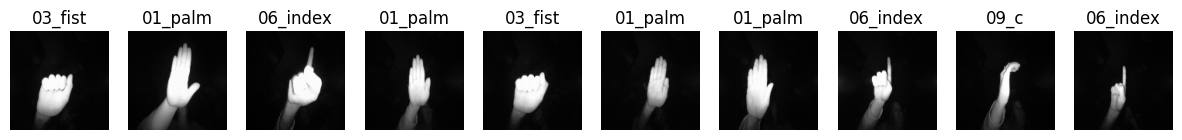

In [19]:
import matplotlib.pyplot as plt
def display_images(images, labels, label_dict, num_images=10):
    plt.figure(figsize=(15, 15))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i].reshape(128, 128), cmap='gray')
        plt.title(list(label_dict.keys())[np.argmax(labels[i])])
        plt.axis('off')
    plt.show()
display_images(X_train, y_train, label_dict, num_images=10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


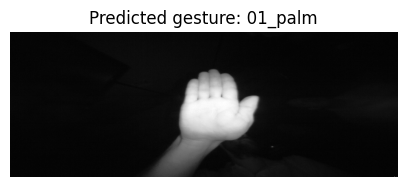

In [25]:
import matplotlib.pyplot as plt
import cv2

# Function to predict gesture from a new image
def predict_gesture(model, img, label_dict):
    img = cv2.resize(img, (128, 128))  # Resize image to match input shape
    img = img.reshape(1, 128, 128, 1) / 255.0  # Normalize and reshape
    prediction = model.predict(img)
    class_idx = np.argmax(prediction)
    return class_idx, prediction

# Function to display a single image with its predicted label
def display_prediction(img, label_dict, class_idx):
    plt.figure(figsize=(5, 5))
    plt.imshow(img, cmap='gray')
    plt.title(f'Predicted gesture: {list(label_dict.keys())[class_idx]}')
    plt.axis('off')
    plt.show()

# Example usage
# Load a new image (update the path to your new image)
new_image_path = '/kaggle/input/leapgestrecog/leapgestrecog/leapGestRecog/03/01_palm/frame_03_01_0088.png'
new_img = cv2.imread(new_image_path, cv2.IMREAD_GRAYSCALE)

# Predict gesture
class_idx, prediction = predict_gesture(model, new_img, label_dict)

# Display the image with the predicted label
display_prediction(new_img, label_dict, class_idx)
